IMPLEMENTING A SIMPLIFIED ATTENTION MECHANISM

In [2]:
import torch

inputs = torch.tensor(
    [[0.43,0.15,0.89],  #Your x1
     [0.55,0.87,0.66],  #journey x2
     [0.57,0.85,0.64],  #starts x3
     [0.22,0.58,0.33],  #with x4
     [0.77,0.25,0.10],  #one x5
     [0.05,0.80,0.55]]  #step x6
)

In [3]:
query = inputs[1] # 2nd input token is the query

attn_scores_2 = torch.empty(inputs.shape[0]) # intialize empty tensor
for i,x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i,query) # dot product of input vector with the query vector

print(attn_scores_2)


tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


Normalization ### Diff between Attention score and weight is that attn score does not sum up to 1 but weight sum upto 1

In [4]:
attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum()
print("Attention wrights: ", attn_weights_2_tmp)
print("Sum: ", attn_weights_2_tmp.sum())

Attention wrights:  tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum:  tensor(1.0000)


We have to use softmax for normalization as it is the most efficient commonly used in LLMs

we can use functions already given by pytorch : the softmax func is as below: -max is done to avoid numerical instability ie when the number is too bif=g or too small
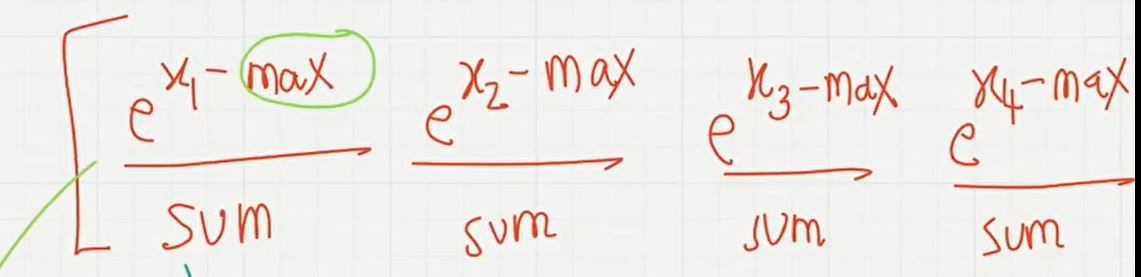

In [8]:
# Naive Softmax implementation
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0)

attn_weights_2_naive = softmax_naive(attn_scores_2)

print("Attention weights: ", attn_weights_2_naive)
print("Sum: ", attn_weights_2_naive.sum())

Attention weights:  tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum:  tensor(1.)


In [9]:
# PyTorch implementation of softmax func
attn_weights_2_py = torch.softmax(attn_scores_2, dim=0)

print("Attention weights: ", attn_weights_2_py)
print("Sum: ", attn_weights_2_py.sum())

Attention weights:  tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum:  tensor(1.)


Context vector calculation:
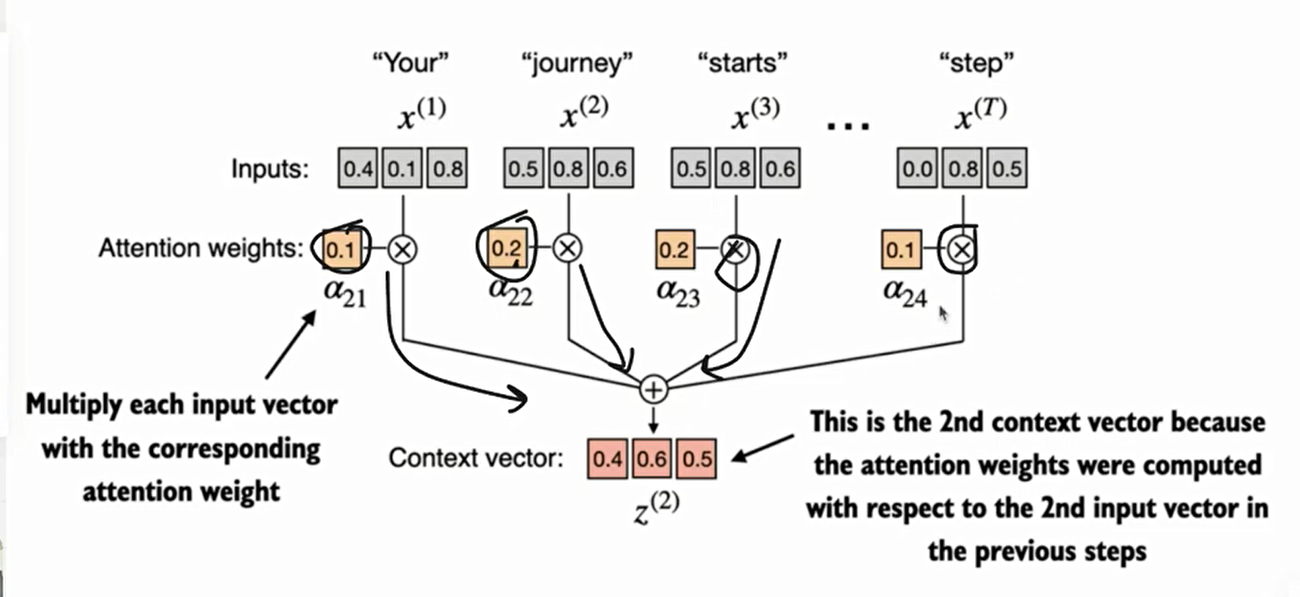

In [10]:
query = inputs[1]

context_vector_2 = torch.zeros(query.shape)
for i, x_i in enumerate(inputs):
    context_vector_2 += attn_weights_2_py[i] * x_i

print(context_vector_2)

tensor([0.4419, 0.6515, 0.5683])


Attention weight matrix:      


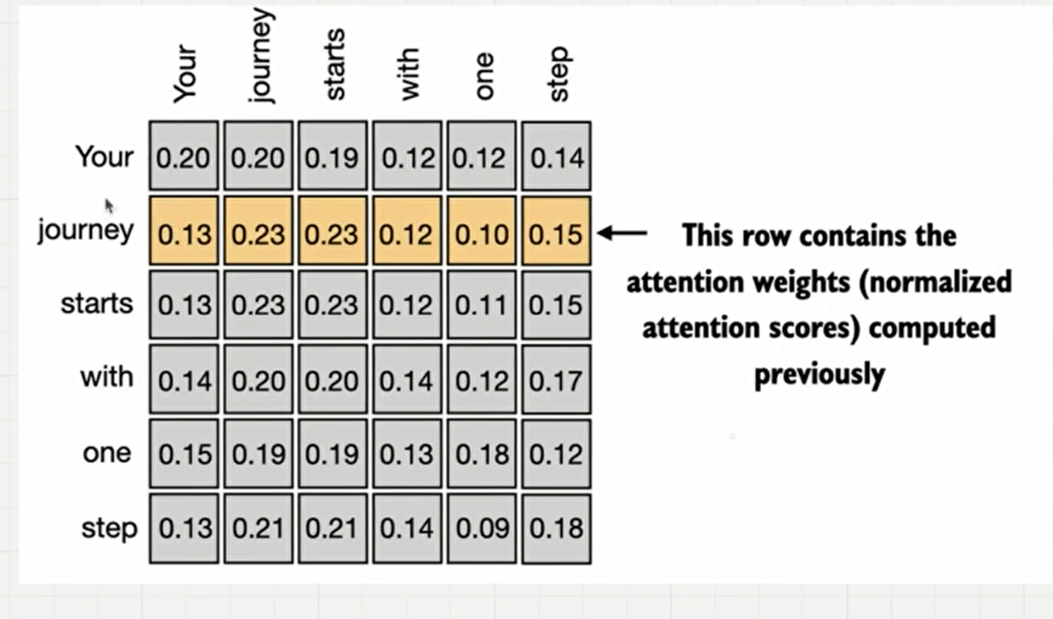

computation to calculate attention weight and context vectors for all inputs:


In [11]:
attn_scores = torch.empty(6,6)

for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i,j] = torch.dot(x_i,x_j)

print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


When computing the preceeding attention score tensor, we use for-loops in python

however, for-loops are generally slow and we can achieve the same results using matrix multiplication

In [12]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


# Normalization

In [15]:
attn_weights = torch.softmax(attn_scores, dim=-1)
print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [16]:
print("All row sums: ", attn_weights.sum(dim=-1))

All row sums:  tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


# Context vector

In [17]:
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])
